## ONLINE RETAIL TRANSACTION ANALYSIS

We analyse online retail transaction data to understand customer behaviour, identify popular products, and optimise pricing and marketing strategies. Provide insights into customer behaviour, popular products, and pricing strategies to improve sales and marketing efforts.

## Objectives

Fetch data from Kaggle. Understand customer behavior, identify customer purchasing patterns. 
Identify popular products by quantity and revenue.
Analyse product seasonality to identify trends in purchasing behavior.
Identify the impact of holidays, discounts, and promotions on sales.
Optimise pricing strategies (analyse the impact of discounts on overall revenue). 
Segment customers based on geographic location to personalise marketing campaigns.
Identify actionable insights to improve customer loyalty and engagement.

## Inputs

Dataset about online retail from Kaggle. 

## Outputs

We have cleaned Online Retail data, filled missed data (Online_retail_Processed.csv) file, and generated visualisation with this dataset. 

## Additional Comments

We have tested hypotheses regarding customer demand retention and the impact of discounts on sales. Based on the results, we would like to propose several insights and recommendations to improve sales performance.


---

# Change working directory

Change the working directory from its current folder to its parent folder. 

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/hackathon1/jupyter_notebooks'

Make the parent of the current directory the new current directory. 

In [3]:
os.chdir(os.path.dirname(current_dir))

Confirm the new current directory

In [4]:
current_dir = os.getcwd()

# Section 1

Understanding customer purchasing patterns is essential for identifying key segments, such as frequent buyers, high-value customers, and those at risk of churn.
Identifying repeat customers and their preferences allows businesses to personalize offers, increase customer loyalty, and drive long-term engagement.
Analyzing product sales helps identify best-selling items, seasonal trends, and underperforming products, which are crucial for optimizing inventory management.

Import libraries for goals. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline


In [6]:
input_file_path = '/workspace/hackathon1/Online_Retail.csv'
processed_file_path ='/workspace/hackathon1/Online_Retail_Processed.csv'

Load the dataset


In [7]:
import pandas as pd

#file_path = '/workspace/hackathon1/Online_Retail.csv'

# Load the dataset
data = pd.read_csv(input_file_path)

# Preview the first few rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


---

Remove duplicates

In [8]:
data_cleaned = data.drop_duplicates()
data.head()
#data.to_csv(processed_file_path, index=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Total 5268 duplicated values which around 0.97% appox 1%
I have dropped duplicated values. 

Load the clean dataset


Data transformation


In [9]:
# Overview of the dataset
data_info = {
    "Shape": data_cleaned.shape,
    "Columns": data_cleaned.columns.tolist(),
    "Missing Values": data_cleaned.isnull().sum().to_dict(),
    "Sample Data": data_cleaned.head(5).to_dict()
}

data_info

{'Shape': (536641, 8),
 'Columns': ['InvoiceNo',
  'StockCode',
  'Description',
  'Quantity',
  'InvoiceDate',
  'UnitPrice',
  'CustomerID',
  'Country'],
 'Missing Values': {'InvoiceNo': 0,
  'StockCode': 0,
  'Description': 1454,
  'Quantity': 0,
  'InvoiceDate': 0,
  'UnitPrice': 0,
  'CustomerID': 0,
  'Country': 0},
 'Sample Data': {'InvoiceNo': {0: '536365',
   1: '536365',
   2: '536365',
   3: '536365',
   4: '536365'},
  'StockCode': {0: '85123A',
   1: '71053',
   2: '84406B',
   3: '84029G',
   4: '84029E'},
  'Description': {0: 'WHITE HANGING HEART T-LIGHT HOLDER',
   1: 'WHITE METAL LANTERN',
   2: 'CREAM CUPID HEARTS COAT HANGER',
   3: 'KNITTED UNION FLAG HOT WATER BOTTLE',
   4: 'RED WOOLLY HOTTIE WHITE HEART.'},
  'Quantity': {0: 6, 1: 6, 2: 8, 3: 6, 4: 6},
  'InvoiceDate': {0: '2010-12-01 08:26:00',
   1: '2010-12-01 08:26:00',
   2: '2010-12-01 08:26:00',
   3: '2010-12-01 08:26:00',
   4: '2010-12-01 08:26:00'},
  'UnitPrice': {0: 2.55, 1: 3.39, 2: 2.75, 3: 3.39, 

Create a new feature: TotalTransactionValue


In [10]:
data_cleaned = data.copy()

# Fill missing descriptions
data_cleaned['Description'] = data_cleaned['Description'].fillna('UNKNOWN PRODUCT')

# Convert InvoiceDate to datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Create a new feature: TotalTransactionValue
data_cleaned['TotalTransactionValue'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']


Now we can see new cleaned dataset. 

In [11]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Descriptive statistics and basic analysis. We can see total sales, average transaction value, number of unique customers, and popular products. 

In [12]:
# Total sales
total_sales = data_cleaned['TotalTransactionValue'].sum()

# Average transaction value
average_transaction_value = data_cleaned['TotalTransactionValue'].mean()

# Number of unique customers
unique_customers = data_cleaned['CustomerID'].nunique()

# Top 5 most popular products by quantity sold
popular_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

# Summary statistics
statistics_summary = {
    "Total Sales": total_sales,
    "Average Transaction Value": average_transaction_value,
    "Number of Unique Customers": unique_customers,
    "Top 5 Popular Products": popular_products.to_dict()
}

statistics_summary

{'Total Sales': 9747747.933999998,
 'Average Transaction Value': 17.98779487699964,
 'Number of Unique Customers': 4372,
 'Top 5 Popular Products': {'WORLD WAR 2 GLIDERS ASSTD DESIGNS': 53847,
  'JUMBO BAG RED RETROSPOT': 47363,
  'ASSORTED COLOUR BIRD ORNAMENT': 36381,
  'POPCORN HOLDER': 36334,
  'PACK OF 72 RETROSPOT CAKE CASES': 36039}}

Preparing the sales trend visualization. First of all we can see monthly sales trend. 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalTransactionValue'],
      dtype='object')


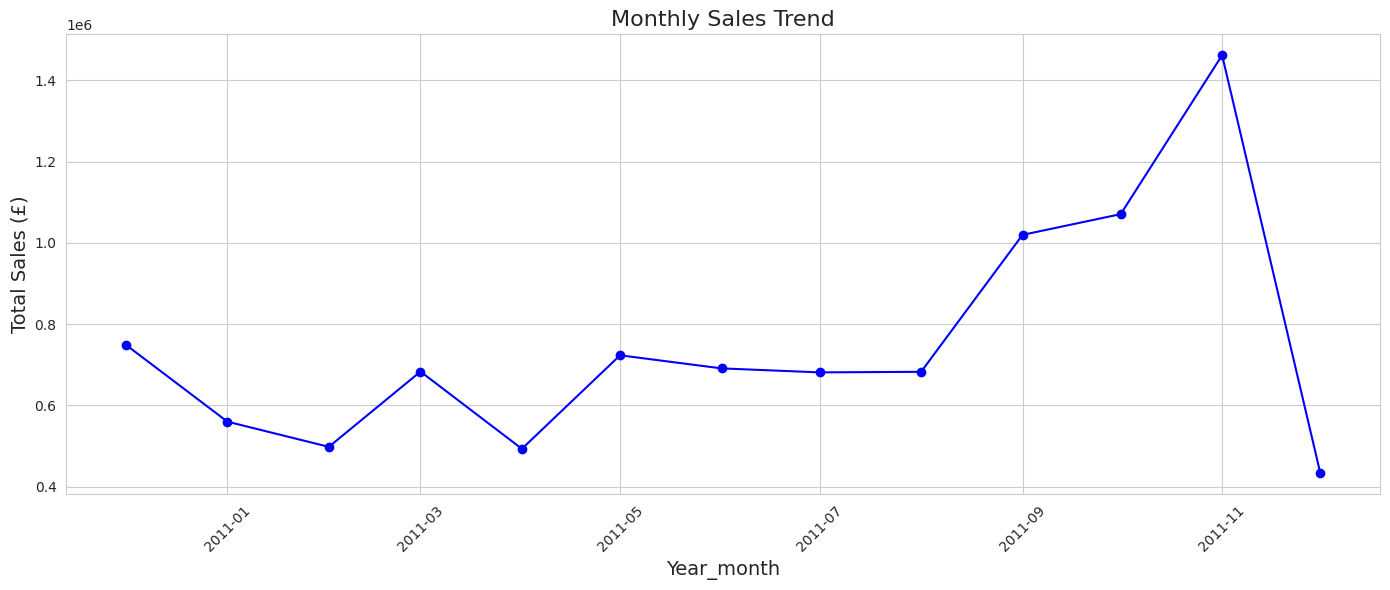

In [13]:
# Ensure the column names are correct
print(data_cleaned.columns)

# Convert InvoiceDate to datetime
data_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Create a new column for Month-Year
data_cleaned.loc[:, 'MonthYear'] = data_cleaned['InvoiceDate'].dt.to_period('M')

# Group by Month-Year and sum TotalTransactionValue
monthly_sales = data_cleaned.groupby('MonthYear')['TotalTransactionValue'].sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Year_month', fontsize=14)
plt.ylabel('Total Sales (£)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Plot the TOP-10 most popular products 

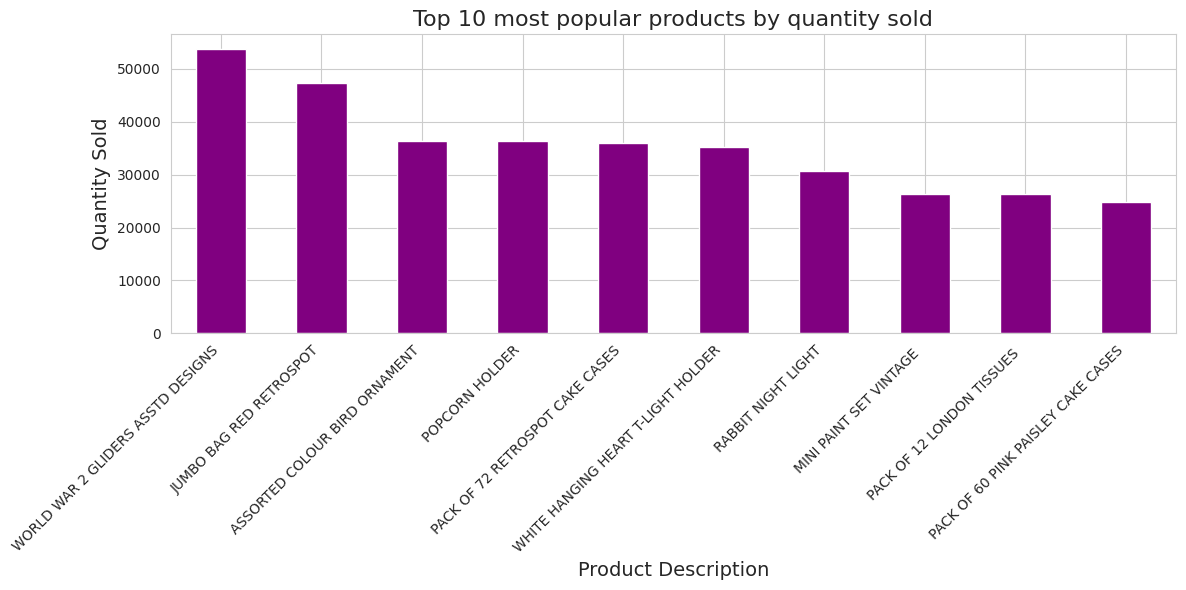

In [14]:
# Identify the top 10 most popular products by quantity sold
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 most popular products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 most popular products by quantity sold', fontsize=16)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Countries of purchasing

Unique Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'Ireland' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Country Counts:
United Kingdom          495478
Germany                   9495
France                    8557
Ireland                   8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Aus

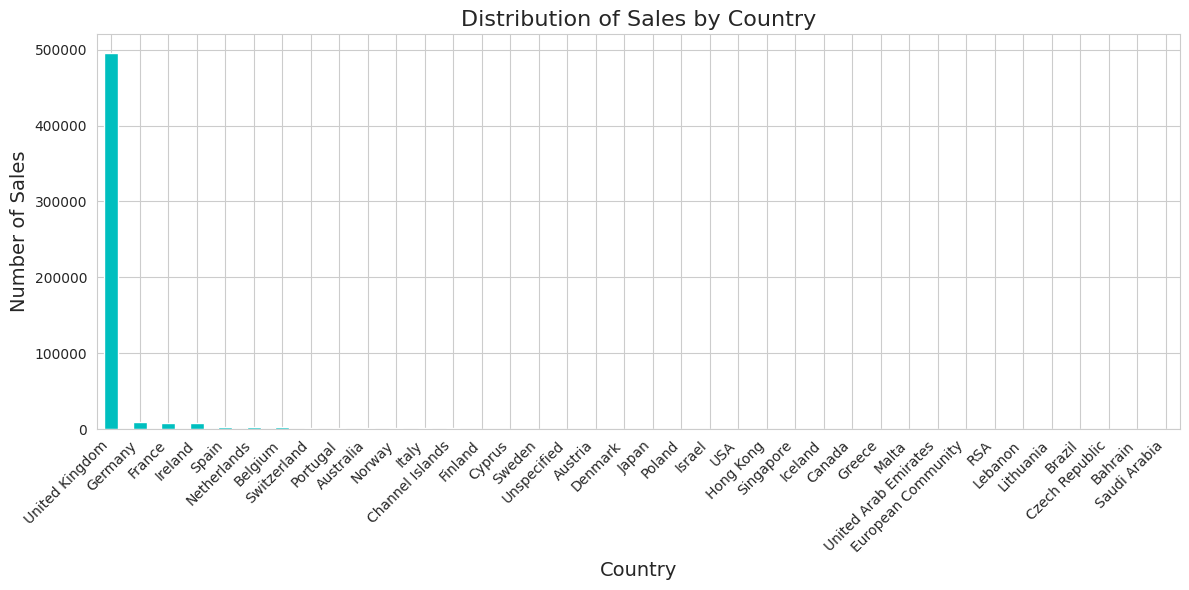

In [15]:
# Replace 'EIRE' with 'Ireland' in the 'Country' column
data_cleaned['Country'] = data_cleaned['Country'].replace('EIRE', 'Ireland')

# Check the unique countries in the dataset
unique_countries = data_cleaned['Country'].unique()

# Count the occurrences of each country
country_counts = data_cleaned['Country'].value_counts()

# Display the unique countries and their counts
print("Unique Countries:")
print(unique_countries)

print("\nCountry Counts:")
print(country_counts)

# Visualize the distribution of countries
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='c')
plt.title('Distribution of Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Top 10 countries with highest sales

Top 10 countries with highest sales:
Country
United Kingdom    8187806.364
Netherlands        284661.540
Ireland            263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalTransactionValue, dtype: float64


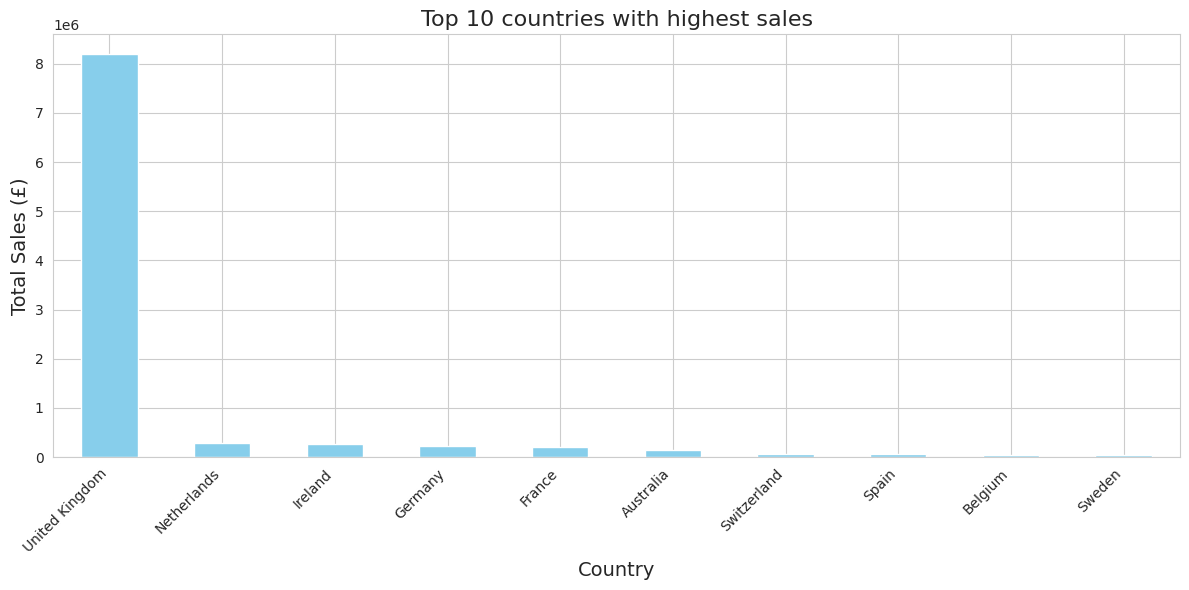

In [16]:
# Group by 'Country' and calculate total sales
country_sales = data_cleaned.groupby('Country')['TotalTransactionValue'].sum().sort_values(ascending=False)[:10]

# Display the top 10 countries with the highest sales
print("Top 10 countries with highest sales:")
print(country_sales)

# Visualize the top 10 countries with highest sales
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 countries with highest sales', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales (£)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Countries with Highest Average UnitPrice:
Country
Singapore    109.645808
Hong Kong     42.505208
Portugal       8.582976
Cyprus         6.302363
Canada         6.030331
Norway         6.012026
Ireland        5.911077
Finland        5.448705
Lebanon        5.387556
Malta          5.244173
Name: UnitPrice, dtype: float64


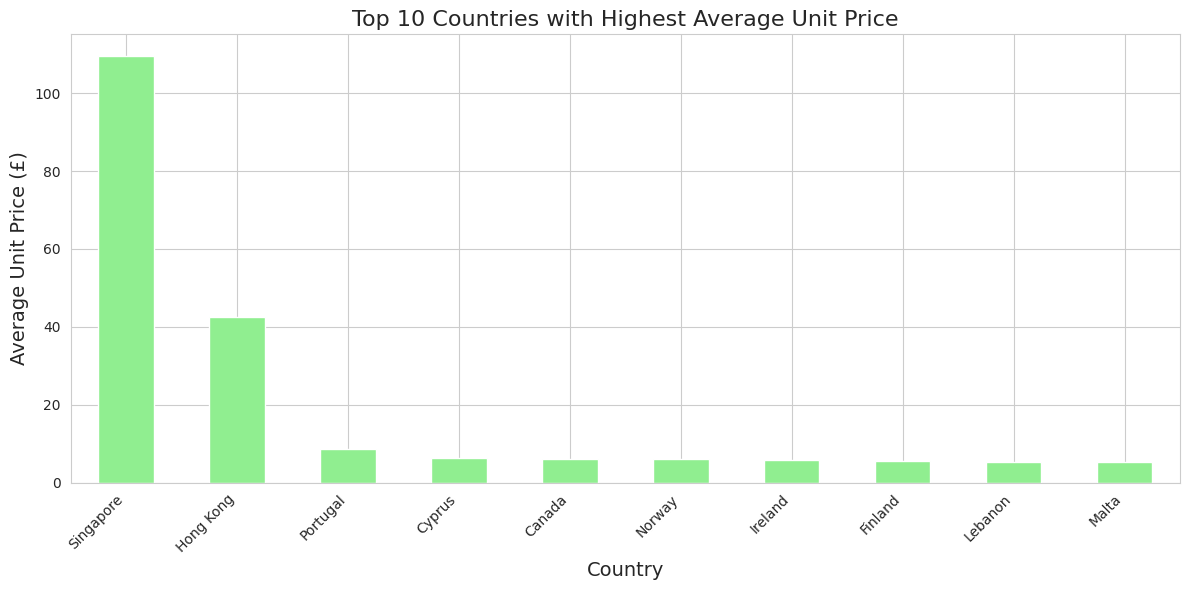

In [17]:
# Group by 'Country' and calculate the average 'UnitPrice' for each country
country_unit_price = data_cleaned.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)[:10]

# Display the top 10 countries with the highest average unit price
print("Top 10 Countries with Highest Average UnitPrice:")
print(country_unit_price)

# Visualize the top 10 countries with the highest average unit price
plt.figure(figsize=(12, 6))
country_unit_price.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries with Highest Average Unit Price', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Unit Price (£)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now we can check sales by day of week and months. 

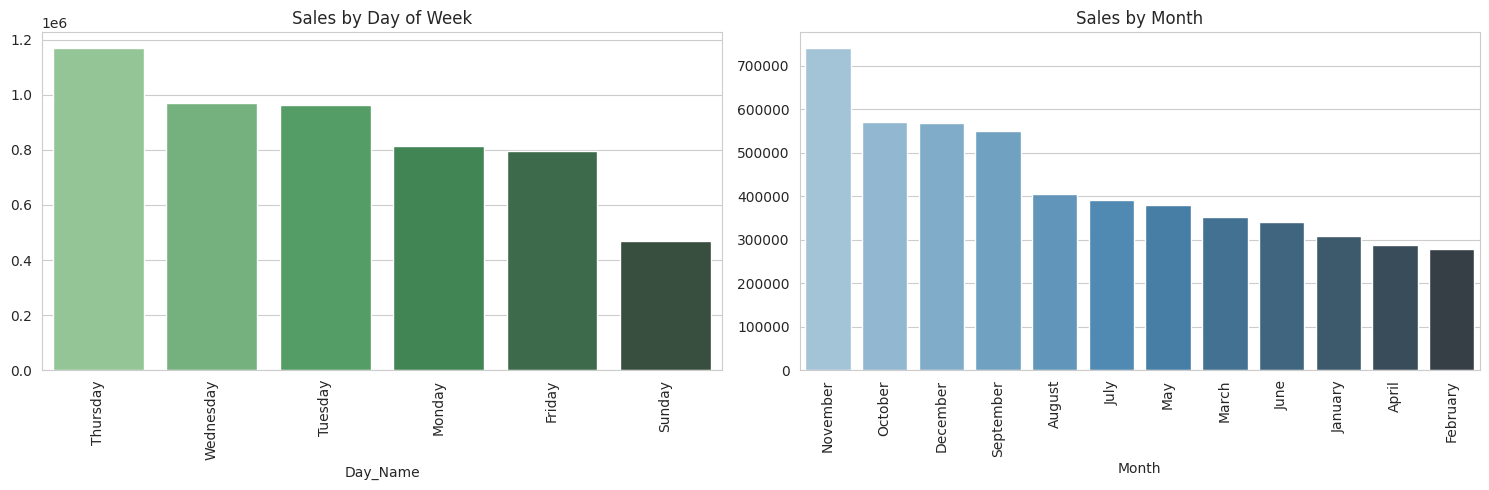

In [18]:
# Create 'Day_Name' (day of the week) and 'Month' (month number)
data_cleaned['Day_Name'] = data_cleaned['InvoiceDate'].dt.day_name()  # Get the day of the week
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month_name()  # Get the month name

# Group by 'Day_Name' and 'Month' and calculate total sales (Quantity)
sales_by_day_of_week = data_cleaned.groupby('Day_Name')['Quantity'].sum().sort_values(ascending=False)
sales_by_day_of_month = data_cleaned.groupby('Month')['Quantity'].sum().sort_values(ascending=False)

# Plotting the sales by day of the week and day of the month
plt.figure(figsize=(15, 5))

# Sales by Day of Week
plt.subplot(1, 2, 1)
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values, palette='Greens_d')
plt.title('Sales by Day of Week')
plt.xticks(rotation=90)

# Sales by Month
plt.subplot(1, 2, 2)
sns.barplot(x=sales_by_day_of_month.index, y=sales_by_day_of_month.values, palette='Blues_d')
plt.title('Sales by Month')
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Top 10 Customer By Quantity

Top 10 Customers by Quantity:
CustomerID
15287    269994
14646    196719
12415     77242
14911     77180
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
Name: Quantity, dtype: int64


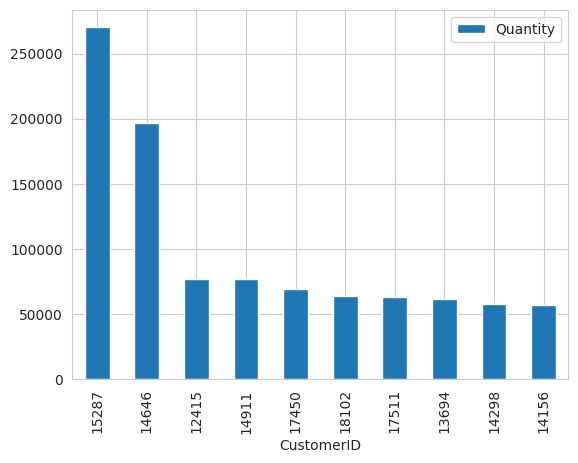

In [19]:
# Assuming cleaned dataset is in the variable 'data_cleaned'
customer_totals = data_cleaned.groupby('CustomerID')['Quantity'].sum()

# Sort the customer totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# Get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

# Print the top 10 customers
print("Top 10 Customers by Quantity:")
print(top_10_customers)

sorted_totals.head(10).plot(kind="bar")
plt.legend()
plt.show()


# Section 2

Create customer-focused marketing strategies to improve engagement. We use customer-focused marketing strategies to improve engagement in order to test our hypotheses regarding sales performance and pricing policies. By applying these strategies, we aim to validate assumptions about how personalized offers, targeted promotions, and optimized pricing impact customer behavior, revenue growth, and overall business performance.

---

Hypothesis 1: Most revenue is generated by a small segment of repeat customers (Pareto principle)

 The Pareto principle (also known as the 80/20 rule, the law of the vital few and the principle of factor sparsity) states that for many outcomes, roughly 80% of consequences come from 20% of causes (the "vital few"). It is an adage of business management that "80% of sales come from 20% of clients."

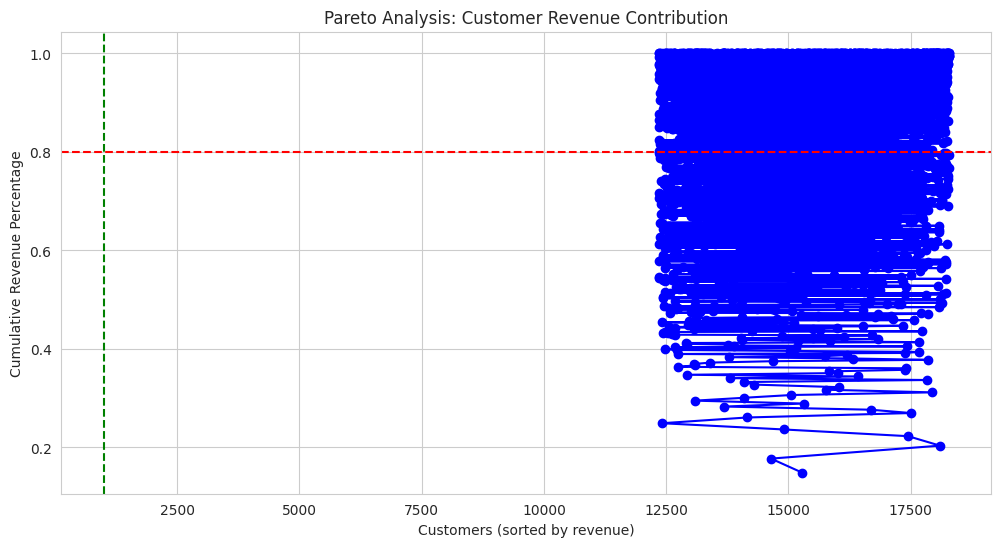

Top 993 customers contribute to 80% of the revenue.


In [20]:
# Group by CustomerID and calculate total revenue
customer_revenue = data_cleaned.groupby('CustomerID')['TotalTransactionValue'].sum().sort_values(ascending=False)

# Calculate cumulative revenue percentage
customer_revenue_cum = customer_revenue.cumsum() / customer_revenue.sum()

# Find the point where 80% of revenue is reached
pareto_cutoff = customer_revenue_cum[customer_revenue_cum <= 0.80].count()

# Plot Pareto chart
plt.figure(figsize=(12, 6))
plt.plot(customer_revenue_cum.index, customer_revenue_cum.values, color='b', marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=pareto_cutoff, color='g', linestyle='--')
plt.title('Pareto Analysis: Customer Revenue Contribution')
plt.xlabel('Customers (sorted by revenue)')
plt.ylabel('Cumulative Revenue Percentage')
plt.show()

print(f"Top {pareto_cutoff} customers contribute to 80% of the revenue.")


This principle suggests that approximately 80% of revenue comes from 20% of customers, while the remaining 80% of customers contribute only a small portion of the revenue.

Hypothesis 2: Certain products contribute more to revenue due to seasonal trends

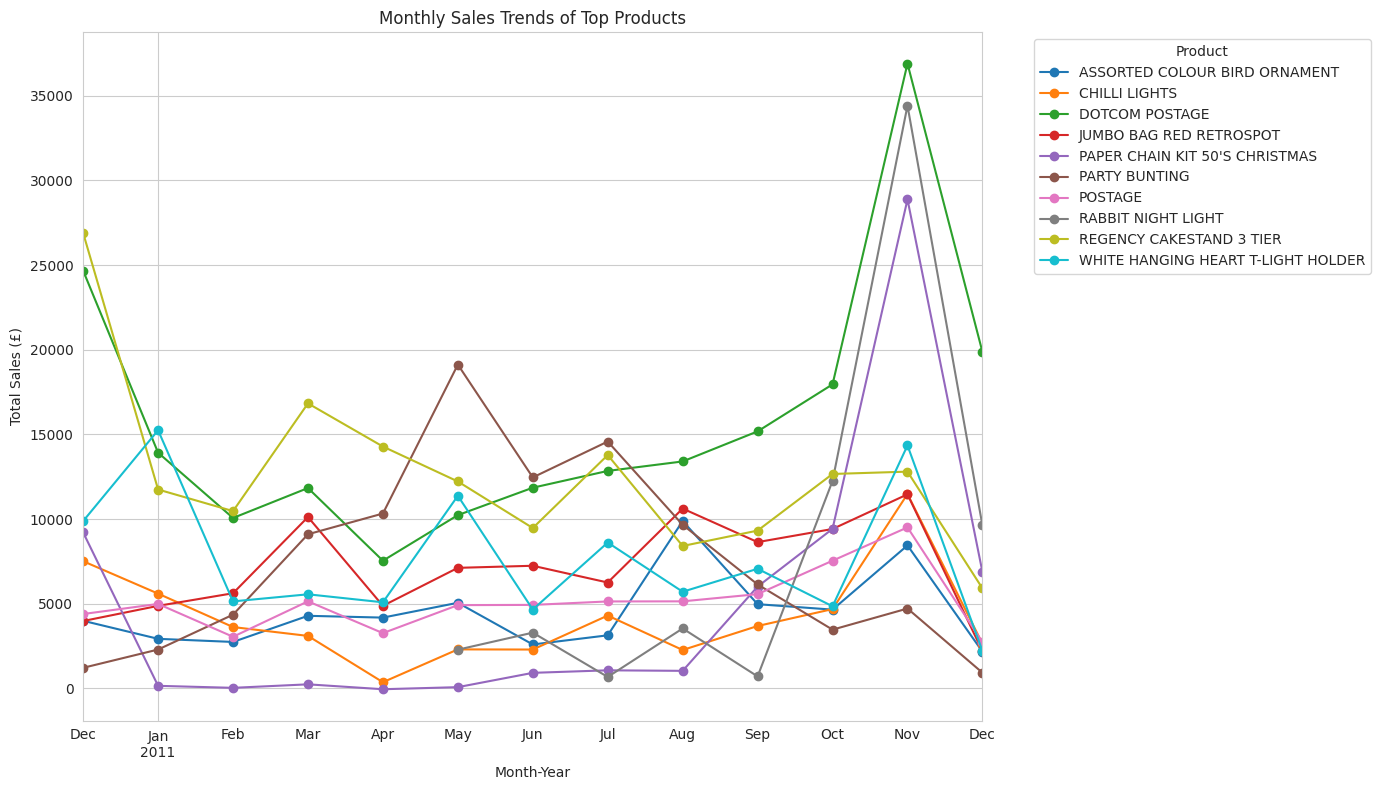

In [21]:
# Group by Description and calculate total revenue
product_revenue = data_cleaned.groupby('Description')['TotalTransactionValue'].sum().sort_values(ascending=False)

# Get the top 10 products
top_products = product_revenue.head(10).index

# Filter data for top products
top_products_data = data_cleaned[data_cleaned['Description'].isin(top_products)]

# Group by MonthYear and Description to calculate monthly sales
top_products_trends = top_products_data.groupby(['MonthYear', 'Description'])['TotalTransactionValue'].sum().unstack()

# Plot the trend for each product
top_products_trends.plot(figsize=(14, 8), marker='o')
plt.title('Monthly Sales Trends of Top Products')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (£)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The code analyzes monthly sales trends of the top 10 products in  dataset and visualizes the results through a line plot. 
The result is sorted in descending order, so that the products contributing most to revenue are at the top. 
This plot is designed to help dentify seasonal trends in sales. Rabbit night lights sales and paper chain kit 50-s Christmas sales spike during a particular time of the year (around Christmas), it indicates a seasonal demand for these products. 
Also regency cakestand 3 tier sales spike during December to May (around Christmas and Easter) indicates a seasonal demand for that product. 

Hypothesis 3: Discounts on popular products will increase overall revenue 

In [22]:
# Identify top products by revenue
top_product = product_revenue.idxmax()

# Apply a 20% discount to the top product
discount_rate = 0.20
data_cleaned['DiscountedPrice'] = data_cleaned.apply(
    lambda x: x['UnitPrice'] * (1 - discount_rate) if x['Description'] == top_product else x['UnitPrice'], axis=1
)

# Calculate new transaction values
data_cleaned['TotalTransactionValue_Discounted'] = data_cleaned['Quantity'] * data_cleaned['DiscountedPrice']

# Compare total revenue before and after discount
total_revenue_before = data_cleaned['TotalTransactionValue'].sum()
total_revenue_after = data_cleaned['TotalTransactionValue_Discounted'].sum()

print(f"Total Revenue Before Discount: £{total_revenue_before:,.2f}")
print(f"Total Revenue After Discount: £{total_revenue_after:,.2f}")
print(f"Revenue Difference: £{total_revenue_after - total_revenue_before:,.2f}")


Total Revenue Before Discount: £9,747,747.93
Total Revenue After Discount: £9,706,498.84
Revenue Difference: £-41,249.10


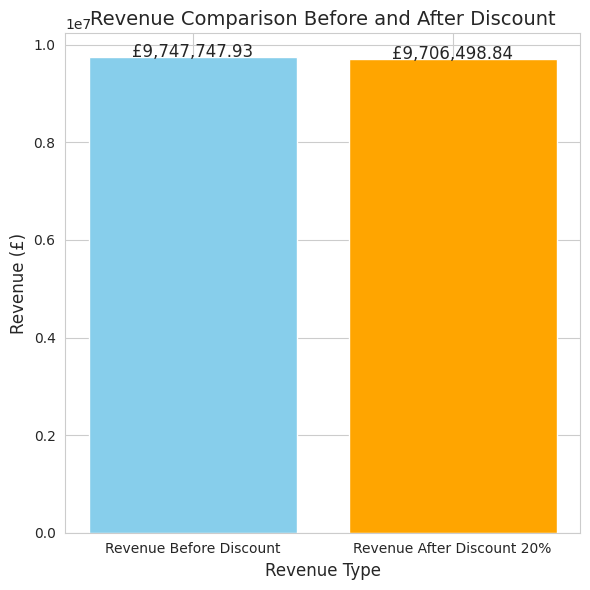

In [23]:
import matplotlib.pyplot as plt

# Data for bar chart
revenue_data = {
    'Revenue Before Discount': total_revenue_before,
    'Revenue After Discount 20%': total_revenue_after
}

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(revenue_data.keys(), revenue_data.values(), color=['skyblue', 'orange'])

# Adding titles and labels
ax.set_title('Revenue Comparison Before and After Discount', fontsize=14)
ax.set_ylabel('Revenue (£)', fontsize=12)
ax.set_xlabel('Revenue Type', fontsize=12)

# Display the value labels on top of each bar
for i, v in enumerate(revenue_data.values()):
    ax.text(i, v + 1000, f'£{v:,.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


My hypothesis was that I expected discounts on a popular product to help increase product sales and, therefore, overall revenue. However, when comparing the total revenue before and after the discount, I see that the total revenue has decreased.

---

# Conclusion


The analysis of the online retail transaction dataset provided valuable insights into customer behavior, product performance, and the effectiveness of pricing strategies. Here's a summary of our key findings, the steps taken to process the dataset, and the recommendations to improve sales performance and customer engagement.

Data preparation and transformation

We began by cleaning the dataset to ensure it was suitable for analysis. 
Removed duplicate rows (approximately 0.97% of the data).
Filled missing product descriptions with "UNKNOWN PRODUCT" to handle missing values.
Converted date columns to a standard datetime format for time-series analysis.
Than we have used feature engineering. 
Created a new feature called TotalTransactionValue, calculated as the product of quantity and unit price.
Extracted additional features such as Month-Year, Day of the Week, and Month to analyze sales trends over time.
Then we have used descriptive statistics and basic analysis to calculate total sales, average transaction value, and the number of unique customers.
Identified the top 10 most popular products by quantity sold and revenue generated.
Analyzed sales distribution by country, revealing key markets and regions with the highest sales.

Key insights 

To create customer-focused marketing strategies that could improve engagement based on the findings from our analysis, we should focus on key insights from the Pareto principle (Hypothesis 1), seasonal product demand (Hypothesis 2), and the effect of discounts (Hypothesis 3).

1.Focus on high-value customers. A small segment of repeat customers is responsible for a significant portion of the revenue (approximately 80% of the revenue comes from the top 20% of customers). 

We could implement loyalty programs targeting these high-value customers. Offering exclusive discounts, early access to sales, or points for every purchase could incentivize them to continue shopping and increase their lifetime value.

Use customer segmentation to send personalized offers based on their buying history, provide these customers free shipping, priority customer service (send personalized emails or push notifications), or special gifts for their loyalty. This will foster long-term customer retention.
We can set up a referral program where high-value customers can refer friends or family to get rewards.

2.Capitalize on seasonal demand for products (seasonal trends). 

Certain products, like Rabbit Night Lights and Paper Chain Kits, experience seasonal spikes, especially during Christmas, while products like the Regency Cake Stand peak during Christmas and Easter.
Plan sales or discounts around peak seasons. For example, we can offer a Christmas or Easter discount on the Regency Cake Stand and other seasonal products. Ensure that promotional content is aligned with the time of year, using festive themes to grab attention.
We can use email marketing to target customers who purchased similar products last year with reminders for upcoming seasonal sales, e.g. send emails before the Christmas season with recommendations for Christmas-themed products. Also we can offer bundle deals that include seasonal products. For example, to bundle the Rabbit Night Lights with related home decor products during the winter holiday season.

3.Evaluating effect of discounts on revenue

Offering a 20% discount on popular products did not increase revenue in the case studied. In fact, total revenue decreased, indicating that discounts may not always be the right strategy for boosting revenue.

Before offering blanket discounts, test the effectiveness on smaller segments of customer base. Instead of offering permanent discounts, run flash sales or limited-time promotions. Create a sense of urgency for the customers, which can drive short-term spikes in sales.
Value-added offers: Rather than focusing on price reductions, consider offering value-added promotions. For example, "Free shipping on orders over £50". 

In a summary analyze customer engagement and predictive insights shows that high-value customers are likely repeat buyers, so their behavior can be modeled to predict future sales. Continuous engagement is very important, especially for high-value customers, who contribute the most to business.